# Dynamical Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%config InlineBackend.figure_format = "retina"

In [2]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
def f(x, t):
    x, y = x
    ẋ = -(x + y)
    ẏ = 6 * x - y
    return ẋ, ẏ

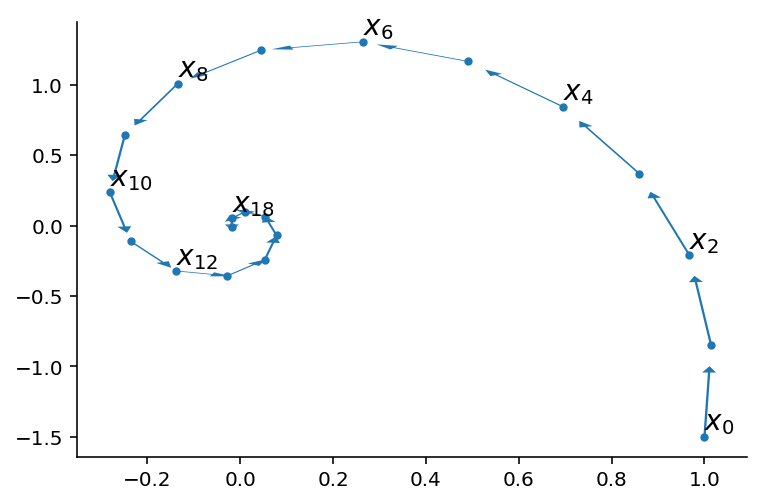

In [4]:
time = np.linspace(0, np.exp(3), 20)
time =np.exp(0.08163265) ** time
X = odeint(f, np.array([1.0, -1.5]), t=time)
plt.scatter(*X.T, s=10)

for i, (init, end) in enumerate(zip(X[:-1], X[1:])):
    Δx = end - init
    plt.arrow(*init, *Δx * 0.7, head_width=0.03, edgecolor="None", width=0.005)
    if i in [0, 2, 4, 6,8, 10, 12, 18]:
        plt.text(*init, "$x_{"f"{i}""}$", horizontalalignment="left",
                 verticalalignment="bottom",
                 fontsize=14)
# plt.savefig("../figures/discrete-dynamical-system.pdf")

## Coupled dynamical system

In [83]:
def g(z, t, a=0.6, c=1.1):
    z, _ = z
    ż = a * z
    ẋ = a * c * z
    return ż, ẋ

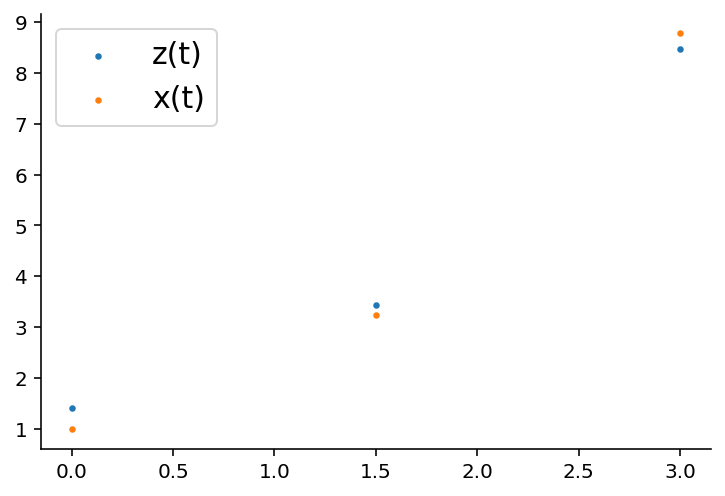

In [84]:
time = np.linspace(0, 3, 3)
X = odeint(g, np.array([1.4, 1.0]), t=time)

plt.scatter(time, X[:, 0], label="z(t)", s=5)
plt.scatter(time, X[:, 1], label="x(t)", s=5)
plt.legend(fontsize=15)

In [85]:
a, c = 0.6, 1.1

In [86]:
M = np.zeros((3, 3))
M[0, 0] = c * a * a
M[1, 1] = a * c
M[2, 2] = c

In [91]:
np.linalg.inv(M) @ np.array([X[0, 0], X[0, 0], X[0, 0]])

array([3.53535354, 2.12121212, 1.27272727])

In [92]:
M

array([[0.396, 0.   , 0.   ],
       [0.   , 0.66 , 0.   ],
       [0.   , 0.   , 1.1  ]])